In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Load pre-processed data
FecalMG_BA = pd.read_csv("FecalMG_BA.csv", index_col=0, delimiter=",")
FecalMG_BA = FecalMG_BA.T
FecalMG_BA.index.name = 'patient_id'

# Define a list of invalid names: no information or virus are invalid
invalid_names = ['f__; g__; s__','g__; s__','Afipia','Abiotrophia','Acidovorax','Acinetobacter','Aeromicrobium','Aquabacterium','Arthrobacter','Asticcacaulis','Aurantimonas','Azoarcus','Azospira','Bacillus','Beijerinckia','Beutenbergia','Bosea','Bradyrhizobium','Brevibacillus','Brevundimonas','Brochothrix','Burkholderia','Caulobacter','Chryseobacterium','Corynebacterium','Craurococcus','Curtobacterium','Deinococcus','Devosia','Dietzia','Dyadobacter','Enhydrobacter','Enterobacter','Escherichia','Facklamia','Flavobacterium','Geodermatophilus','Hoeflea','Hydrotalea','Janibacter','Kingella','Kocuria','Leptothrix','Limnobacter','Massilia','Mesorhizobium','Methylobacterium','Methylophilus','Methyloversatilis','Microbacterium','Micrococcus','Microlunatus','Nevskia','Niastella','Novosphingobium','Ochrobactrum','Olivibacter','Oxalobacter','Paenibacillus','Paracoccus','Patulibacter','Pedobacter','Pedomicrobium','Pelomonas','Phyllobacterium','Polaromonas','Propionibacterium','Pseudomonas','Pseudoxanthomonas','Psychrobacter','Ralstonia','Rhizobium','Rhodococcus','Roseomonas','Schlegelella','Sphingobium','Sphingomonas','Sphingopyxis','Stenotrophomonas','Streptococcus','Sulfuritalea','Tsukamurella','Undibacterium','Variovorax','Wautersiella','Xanthomonas']

for col in FecalMG_BA.columns:
    if any(invalid_name in col for invalid_name in invalid_names):
        FecalMG_BA.drop(col, axis=1, inplace=True)

FecalMG_BA.index = FecalMG_BA.index.astype(str)
FecalMG_BA

Patient_id,Pisciglobus,Pleomorphomonas,Ensifer,Parvimonas,Gibbsiella,Oscillibacter,Gracilibacter,Desulfobacterium,Dissulfuribacter,Thiomicrospira,...,Desertibacter,Paraglaciecola,Gangjinia,Anaplasma,Klebsiellaquasipneumoniae,Psychrobium,Anoxybacter,Alkalibaculum,Natronoflexus,Methanosphaera
patient_id,,,,,,,,,,,,,,,,,,,,,
10023,0.0,0.0,0.0,3.400000,1.811111,28.666667,0.000000,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,0.000000,0.000000,0.000000,0.500000,0.666667,0.0
10025,0.0,0.0,0.0,10.666667,0.000000,226.666667,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.116667,0.000000,0.200000,0.0
10029,0.0,0.0,0.0,0.000000,1.300000,1716.704762,0.285714,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,6.400000,0.000000,0.000000,0.000000,0.000000,0.0
10031,0.0,0.0,0.0,2.200000,11.305556,68.000000,0.791667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.966667,0.000000,0.000000,0.000000,0.000000,0.0
10036,0.0,0.0,0.0,2.400000,0.000000,85.238095,0.250000,0.0,0.0,0.4,...,0.0,0.2,0.0,0.0,0.000000,0.666667,0.000000,1.083333,6.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097.1,0.0,0.0,0.0,30.000000,8.511111,320.300000,1.488889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,37.900000,0.000000,0.000000,0.000000,5.333333,0.0
10099.1,0.0,0.0,0.0,0.000000,0.683333,107.700000,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100000,0.000000,0.000000,0.000000,1.333333,0.0
10199.1,0.0,0.0,0.0,0.666667,2.133333,424.900000,0.400000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.200000,0.000000,0.000000,1.000000,0.366667,0.0


In [39]:
metadata = pd.read_csv("Metadata_FecalMG.csv", index_col=0,delimiter=",")
#metadata = metadata.dropna()
metadata.index.name = 'patient_id'
metadata.index = metadata.index.astype(str)
metadata

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
patient_id,,,,,,,,
10021,Stage_I_II,I,57,M,26.8809517,130,993,Left colon
10023,Healthy,-,65,M,26.5625,660,0,-
10025,Healthy,-,40,M,25,400,993,-
10029,Healthy,-,67,F,20.17325264,0,0,-
10031,Healthy,-,77,M,24.4646016,300,813,-
...,...,...,...,...,...,...,...,...
12276,Healthy,-,46,M,21.79944511,0,430,-
12340,Healthy,-,59,M,26.53375883,0,989.9,-
12370,Healthy,-,65,F,18.25631871,0,0,-


In [40]:
metadata.columns

Index(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'],
      dtype='object')

In [41]:
class_counts = metadata['Tumor location'].value_counts()
print(class_counts)

Tumor location
-                                     358
Rectum                                 95
Right colon                            83
Left colon                             69
Left colon and Right colon              7
Left colon and Rectum                   2
Rectum and Left colon                   1
Rectum, Left colon and Right colon      1
Name: count, dtype: int64


In [42]:
FecalMG_BA_Final = pd.merge(FecalMG_BA, metadata, on='patient_id', how='inner')
location_mapping = {
    'Left colon and Right colon': 'Others',
    'Left colon and Rectum': 'Others',
    'Rectum and Left colon': 'Others',
    'Rectum, Left colon and Right colon': 'Others',
}

FecalMG_BA_Final['Tumor location'] = FecalMG_BA_Final['Tumor location'].replace(location_mapping)
# Drop rows where 'Tumor location' is '-'
FecalMG_BA_Final = FecalMG_BA_Final[FecalMG_BA_Final['Tumor location'] != '-']
FecalMG_BA_Final
#FecalMG_BA_Final.to_csv('SingaporeCRC_data/FecalMG_BA_Final', index=False)

,Pisciglobus,Pleomorphomonas,Ensifer,Parvimonas,Gibbsiella,Oscillibacter,Gracilibacter,Desulfobacterium,Dissulfuribacter,Thiomicrospira,...,Natronoflexus,Methanosphaera,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
patient_id,,,,,,,,,,,,,,,,,,,,,
10033,0.00,0.0,0.0,1.000000,0.166667,1125.992857,10.200000,0.0,0.0,0.400,...,32.866667,0.0,Stage_0,0,54,F,24.74745426,0,42.8571,Rectum
10047,0.00,0.0,0.0,0.222222,0.900000,532.885714,54.497222,0.0,0.0,1.025,...,2.244444,21.0,Stage_0,0,73,M,22.32142857,2400,149.207,Left colon
10055,0.00,0.0,0.0,8.000000,1.300000,66.333333,0.666667,0.0,0.0,0.400,...,0.200000,0.0,Stage_0,0,56,F,17.4817898,155,0,Left colon
10081,0.00,0.0,0.0,4.000000,1.650000,119.633333,0.366667,0.0,0.0,0.400,...,0.000000,0.0,Stage_0,0,65,M,21.8299522,0,0,Right colon
10134,0.25,0.0,0.0,9.266667,0.400000,90.900000,0.866667,0.0,0.0,1.600,...,0.600000,0.0,Stage_0,0,63,F,36.5230095,420,0,Rectum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,0.00,0.0,0.0,0.000000,0.000000,1428.657143,9.500000,0.0,0.0,0.000,...,0.000000,0.0,Stage_I_II,I,55,M,22.5981405,0,0,Right colon
12020,0.00,0.0,0.0,4.400000,0.000000,187.300000,0.783333,0.0,0.0,0.000,...,2.000000,0.0,Stage_I_II,I,67,F,24.44444444,0,0,Left colon
12022,0.00,0.0,0.0,31.866667,0.000000,956.666667,12.000000,0.0,0.0,0.400,...,0.000000,0.0,Stage_I_II,II,74,F,23.55555556,0,0,Right colon


In [43]:
class_counts = FecalMG_BA_Final['Tumor location'].value_counts()
print(class_counts)

Tumor location
Rectum         95
Right colon    83
Left colon     69
Others         11
Name: count, dtype: int64


In [44]:
# Prepare features and target variable
X = FecalMG_BA_Final.drop(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = FecalMG_BA_Final['Tumor location']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['Left colon' 'Others' 'Rectum' 'Right colon']
Unique values of y: [0 1 2 3]
Shape of y: (258, 1861)
Shape of y: (258,)


In [45]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)

(380, 1861)
(380,)


Best Parameters: {'max_features': 0.2, 'n_estimators': 200}
Best Score: 0.5853005464480874
Test Set Accuracy: 0.5921052631578947


<Figure size 800x600 with 0 Axes>

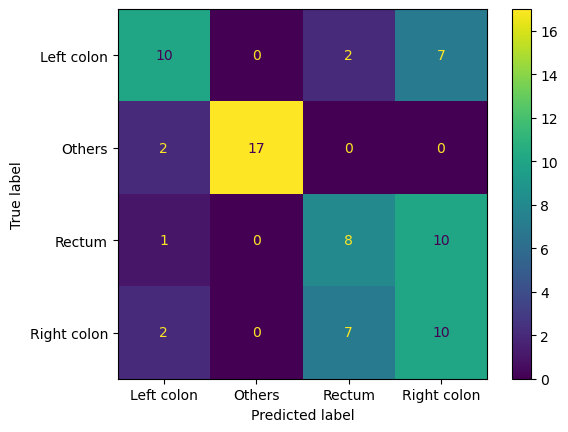

              precision    recall  f1-score   support

  Left colon       0.67      0.53      0.59        19
      Others       1.00      0.89      0.94        19
      Rectum       0.47      0.42      0.44        19
 Right colon       0.37      0.53      0.43        19

    accuracy                           0.59        76
   macro avg       0.63      0.59      0.60        76
weighted avg       0.63      0.59      0.60        76



In [46]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Left colon', 'Others', 'Rectum', 'Right colon'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Left colon', 'Others', 'Rectum', 'Right colon'])
print(report)

In [47]:
# Train RF model with best parameters for calculating feature importances
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
y_score = best_rf_model.fit(X_train, y_train).predict_proba(X_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.85
Macro-averaged One-vs-Rest ROC AUC score:
0.82


C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_24872\3500966728.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')


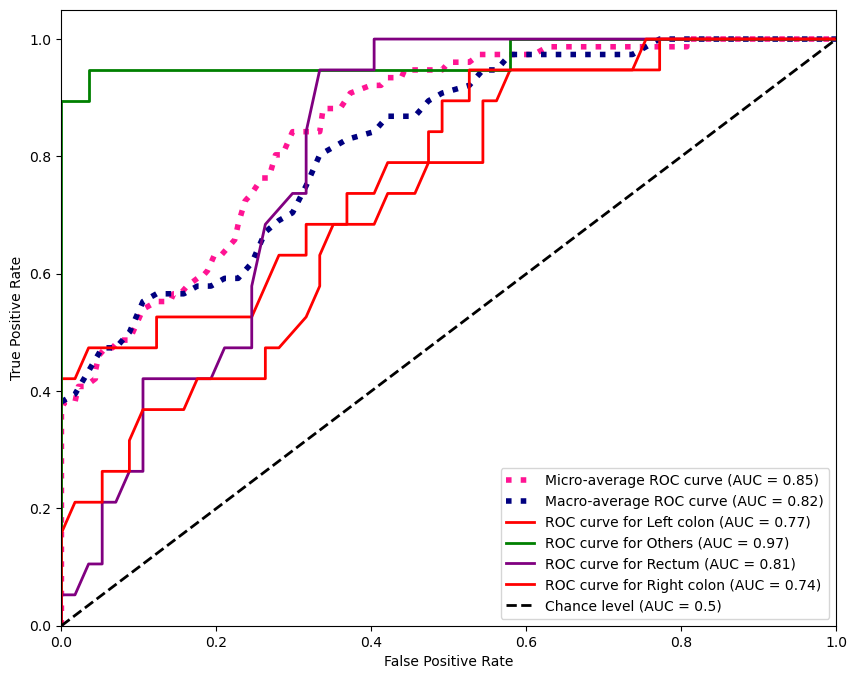

In [48]:
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.arange(4))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 4

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['red', 'green', 'purple', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for {0} (AUC = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_24872\569670634.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")


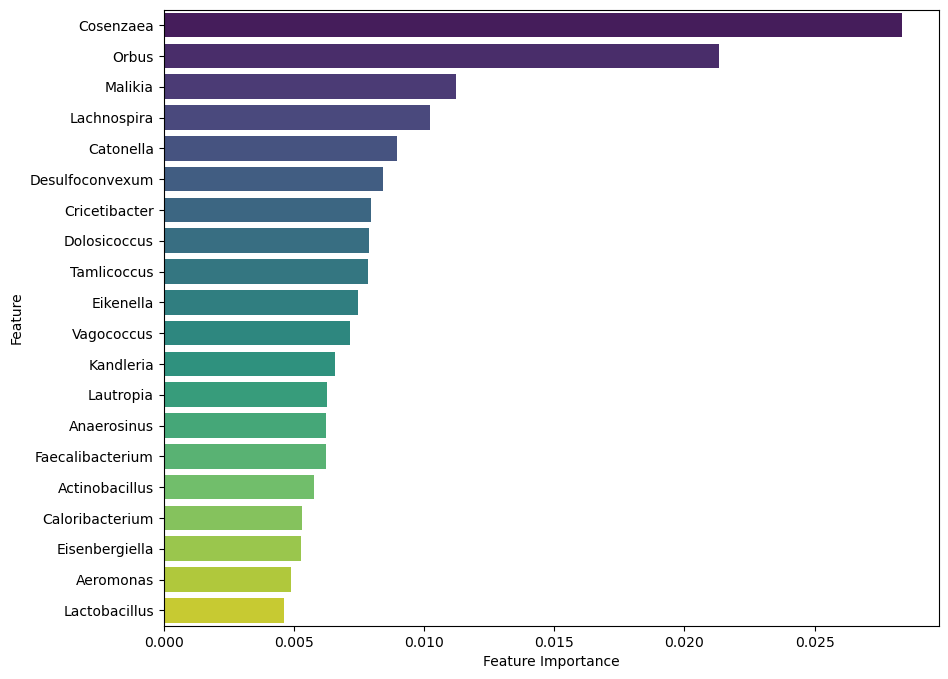

In [49]:
# Train RF model with best parameters for calculating feature importances
best_rf_model.fit(X_train, y_train)

feature_importances = best_rf_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=feature_names[top_20_indices], palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

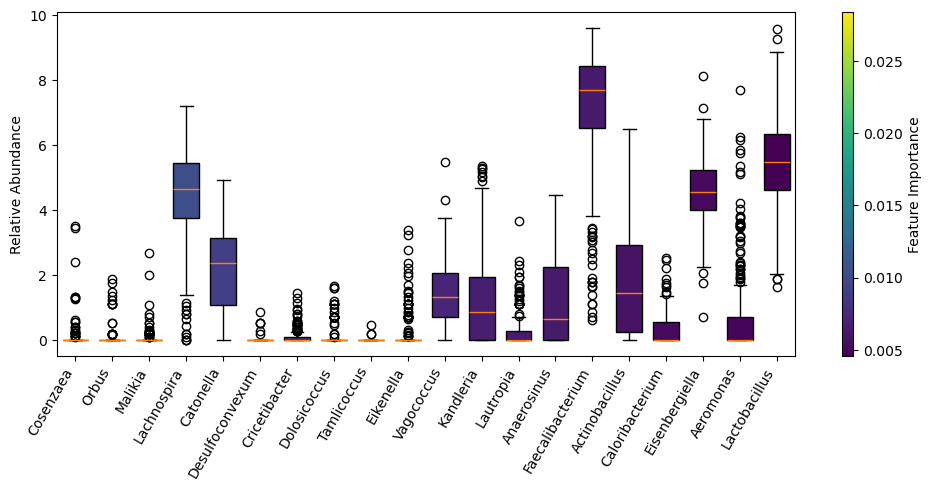

In [50]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

top_20_feature_names = feature_names[top_20_indices]

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

# Prepare data for boxplot
data = {}
scaled_X = np.log(X+1)

for column_name in top_20_feature_names:
    data[column_name] = scaled_X[column_name]

# Plot boxplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

# Customize plot
ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

In [51]:
#Evaluate the robustness of ML framework

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []

for i in range(n_iterations):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    test_score = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)
    test_auroc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='macro')
    robustness_auroc.append(test_auroc)

# Calculate statistics for training data
robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

# Calculate statistics for test data
robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

# Calculate statistics for AUROC
robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)


Train Mean Accuracy: 0.6395191256830601
Train Std Accuracy: 0.017111562697514474
Test Mean Accuracy: 0.6335526315789474
Test Std Accuracy: 0.05234709298561211
Mean AUROC: 0.8474780701754385
Std AUROC: 0.025126208612944203


In [52]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"Test_AUROC_scores: {robustness_auroc}" )

Train_accuracy_scores: [0.5956284153005463, 0.6744262295081966, 0.6580874316939891, 0.6347540983606558, 0.6314754098360656, 0.6351912568306011, 0.6545355191256831, 0.6580327868852459, 0.6415300546448087, 0.6281967213114755, 0.6414207650273224, 0.6479781420765027, 0.6610928961748633, 0.6283060109289618, 0.6184153005464481, 0.6484699453551912, 0.6316393442622951, 0.6447540983606557, 0.6316393442622951, 0.6248087431693989]
Test_accuracy_scores: [0.7763157894736842, 0.5526315789473685, 0.6052631578947368, 0.5394736842105263, 0.6447368421052632, 0.618421052631579, 0.618421052631579, 0.5921052631578947, 0.6578947368421053, 0.6052631578947368, 0.6973684210526315, 0.6052631578947368, 0.6052631578947368, 0.6578947368421053, 0.6842105263157895, 0.6842105263157895, 0.6052631578947368, 0.6710526315789473, 0.6052631578947368, 0.6447368421052632]
Test_AUROC_scores: [0.9003924284395198, 0.8125577100646353, 0.836218836565097, 0.8089796860572483, 0.8545706371191135, 0.8605724838411818, 0.83056325023084